#Business Understanding

#Data Understanding

In [104]:
# Import modules & packages

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # to encode binary features
from scipy import stats

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Set the style to "darkgrid" and "ggplot"
sns.set_style("darkgrid")
plt.style.use("ggplot")

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')


In [105]:
#Loading  Churn in Telecom's dataset
df = pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Data Preparation

In [106]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [107]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [108]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [109]:
df.rename(columns={'account length':'account_length', 'area code': 'area_code', 'phone number': 'phone_number', 'international plan': 'intl_plan', 'voice mail plan': 'vmail_plan', 'number vmail messages': 'qty_vmails', 'total day minutes':'sum_day_mins','total day calls':'sum_day_calls', 'total day charge':'total_day_charge', 'total eve minutes':'sum_eve_mins', 'total eve calls': 'sum_eve_calls', 'total eve charge': 'total_eve_charge', 'total night minutes':'sum_night_mins', 'total night calls':'sum_night_calls', 'total night charge': 'total_night_charge', 'total intl minutes':'sum_intl_mins', 'total intl calls': 'sum_intl_calls', 'total intl charge': 'total_intl_charge', 'customer service calls': 'cust_serv_calls'}, inplace = True)
df.head()

,state,account_length,area_code,phone_number,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,...,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [110]:
df.describe()

,account_length,area_code,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [111]:
df.duplicated(subset='phone_number').value_counts()

False    3333
dtype: int64

In [112]:
df.dtypes

state                  object
account_length          int64
area_code               int64
phone_number           object
intl_plan              object
vmail_plan             object
qty_vmails              int64
sum_day_mins          float64
sum_day_calls           int64
total_day_charge      float64
sum_eve_mins          float64
sum_eve_calls           int64
total_eve_charge      float64
sum_night_mins        float64
sum_night_calls         int64
total_night_charge    float64
sum_intl_mins         float64
sum_intl_calls          int64
total_intl_charge     float64
cust_serv_calls         int64
churn                    bool
dtype: object

In [113]:
df['area_code'] = df['area_code'].astype(str)

##Creating Categorical columns

In [114]:
# Creating categorical columns
categorical_columns = ['intl_plan', 'vmail_plan', 'churn']

# Creating numerical columns
numeric_columns = df.drop(categorical_columns, axis=1)
numeric_columns.head()

,state,account_length,area_code,phone_number,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls
0,KS,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


#Exploratory Data Analysis

In [115]:
import plotly.express as px

fig = px.pie(df, names='churn', title='Churn Distribution',
             labels=['No Churn', 'Churn'], color_discrete_sequence=['skyblue', 'red'],
             hole=0.3, height=500, width=800)
fig.update_layout(font=dict(size=16), showlegend=False)

fig.show()

###The percentage of loyal subcribers from the churn distribution is 85.5%

##Univariate Analysis of categorical columns

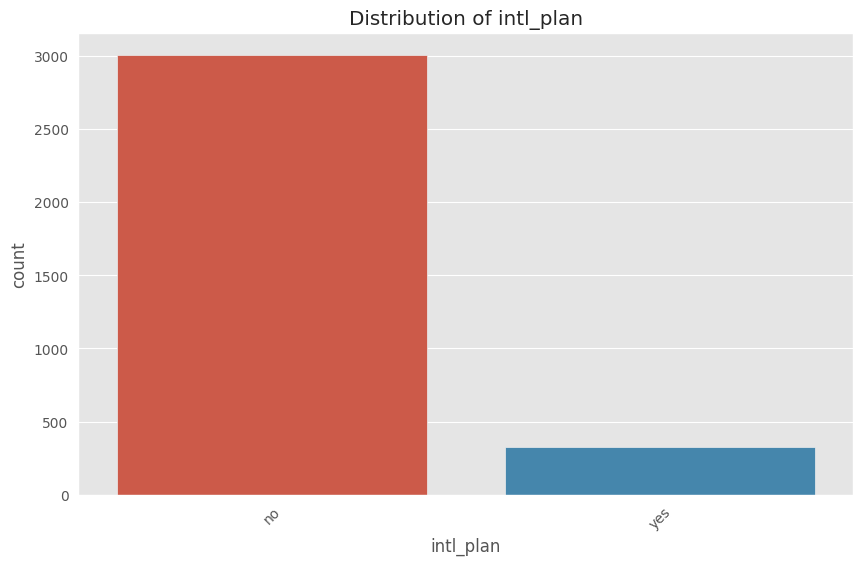

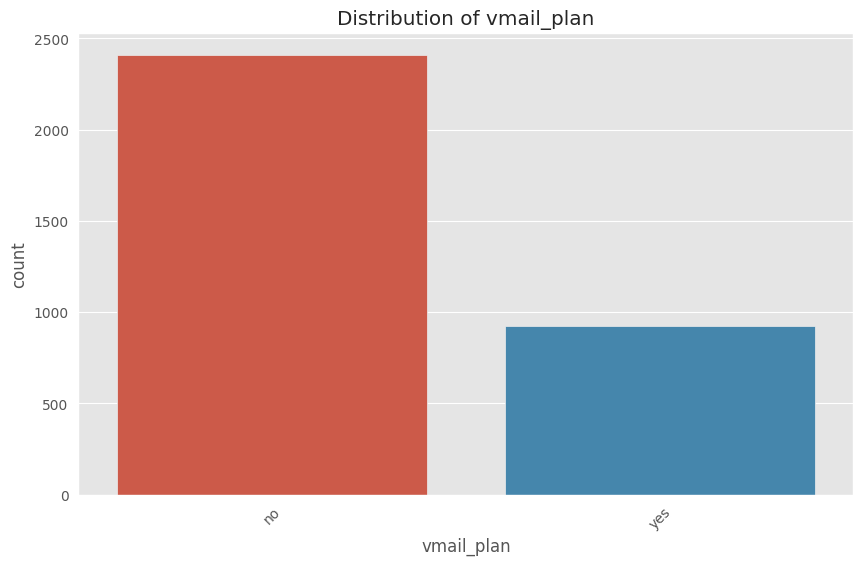

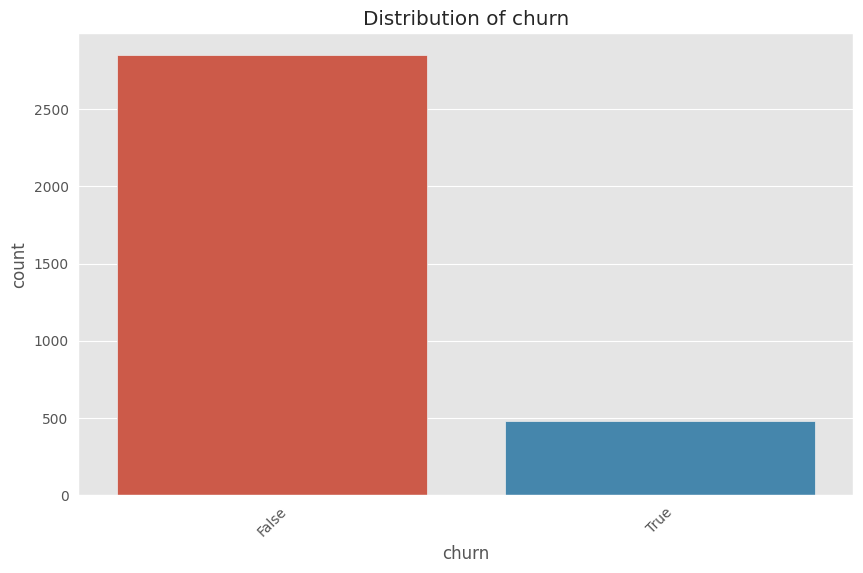

In [116]:
for feature in categorical_columns:

    plt.figure(figsize=(10, 6))
    order = df[feature].value_counts().iloc[0:15].index
    sns.countplot(x=feature, data=df, order=order)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()

##Churn distribution based on area code

In [117]:
# Pie chart of area code feature
area = df['area_code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(df,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

###Area Code 415 has the highest percentage for churn distribution. Almost half of the customers churned.





##Unique values for categorical features

In [118]:
# unique values of categorical features
categorical_cols = df.drop('phone_number', axis=1).select_dtypes(include='object').columns
for col in categorical_cols:
    print(col.upper())
    print(df[col].unique())
    print('****************************************************** \n')

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
****************************************************** 

AREA_CODE
['415' '408' '510']
****************************************************** 

INTL_PLAN
['no' 'yes']
****************************************************** 

VMAIL_PLAN
['yes' 'no']
****************************************************** 



###Bivariate Analysis (Churn distribution for customer service and Area code)

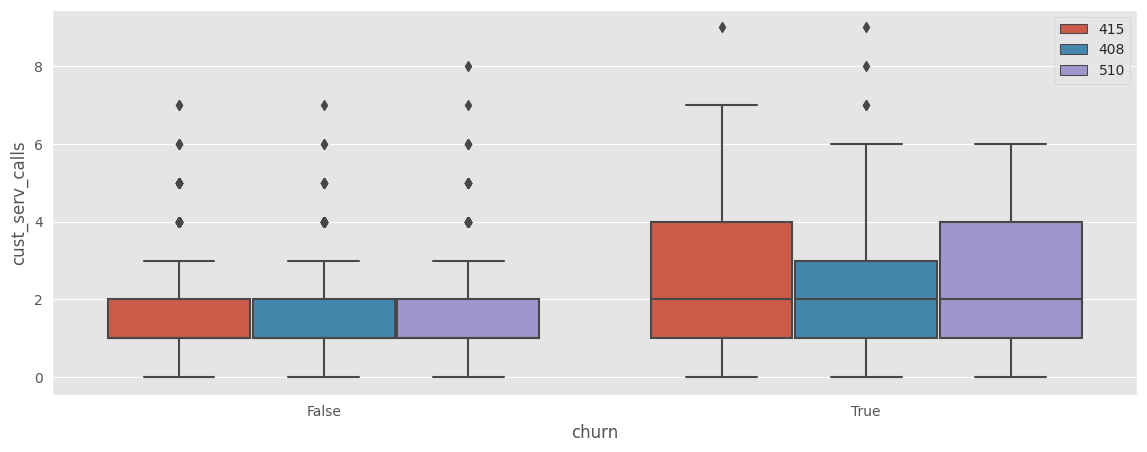

In [119]:
#Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='cust_serv_calls',hue='area_code');
plt.legend(loc='upper right');

###Most of the people who unsubscibed from the service were from area code 415 and 510 and theres also a number of outliers present.

##Multivariate Analysis(Numerical Features)

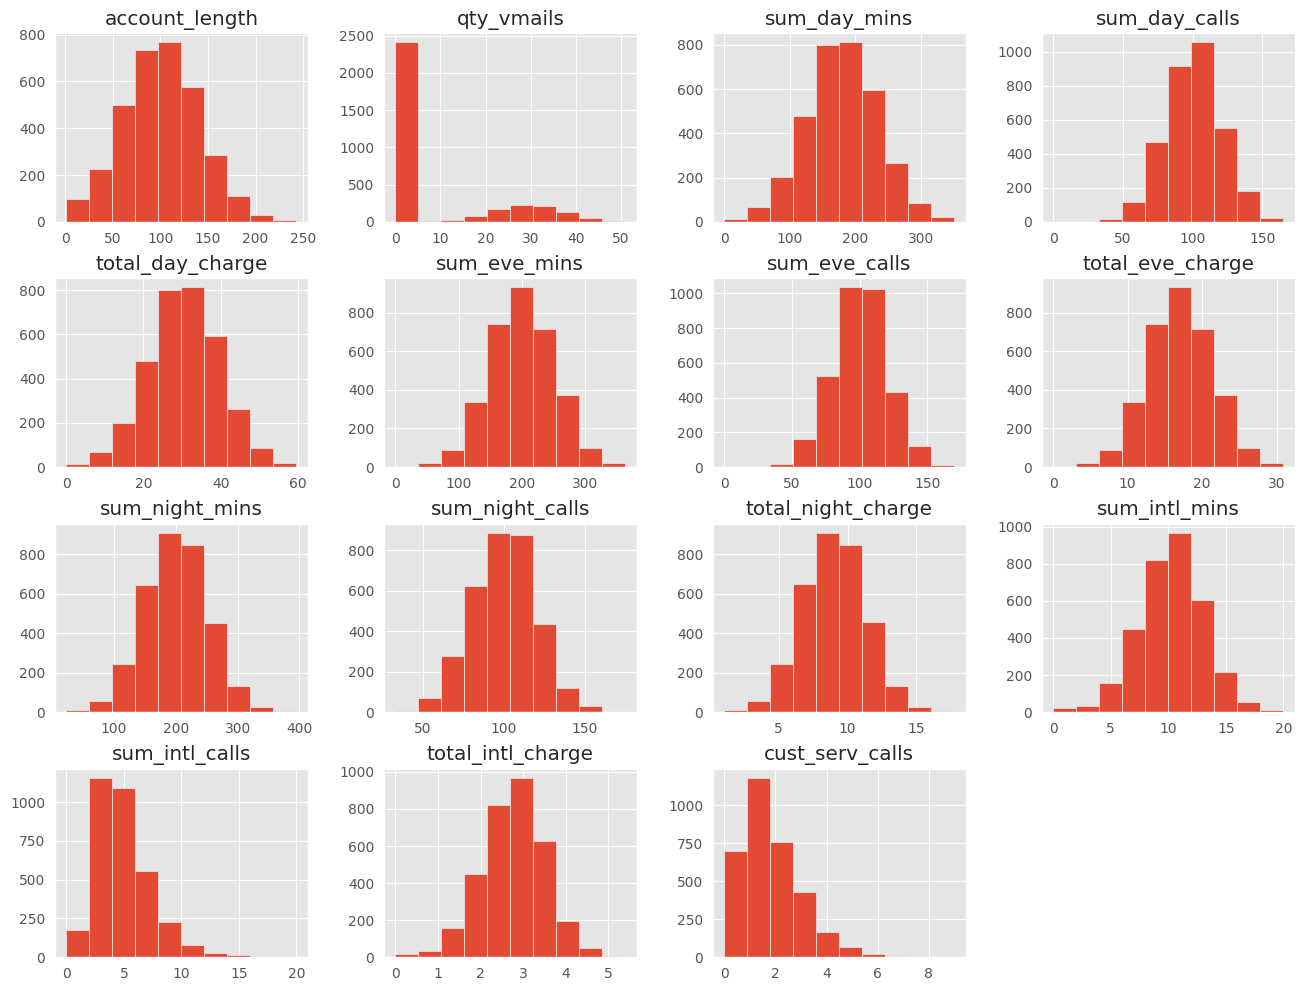

In [120]:
# distribution of features
df.drop(columns='churn').hist(figsize=(16,12));

###Most of the features shown above show a normal distribution except for customer service calls

In [121]:
#Multivariate analysis

corr =  df.corr(numeric_only=True)["churn"].sort_values().to_frame()
corr

,churn
qty_vmails,-0.089728
sum_intl_calls,-0.052844
sum_night_calls,0.006141
sum_eve_calls,0.009233
account_length,0.016541
sum_day_calls,0.018459
sum_night_mins,0.035493
total_night_charge,0.035496
sum_intl_mins,0.068239
total_intl_charge,0.068259


##Correlation Heat Nap for all Numerical Columns

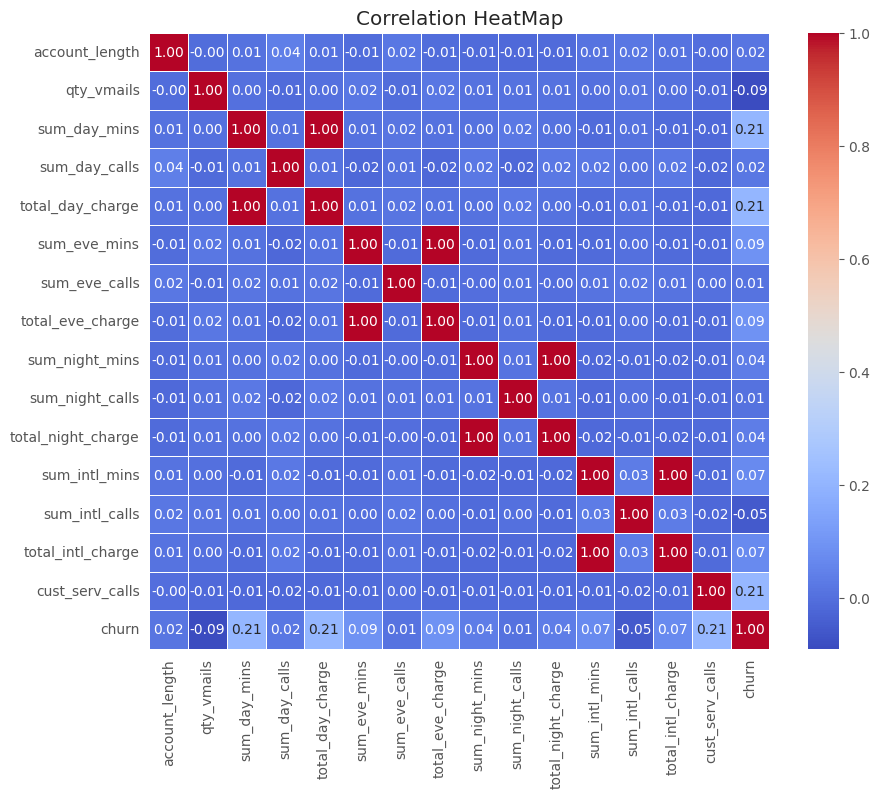

In [122]:
#Calculating the correlation
correlations = df.corr(numeric_only=True)

#Calculate a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation HeatMap")
plt.show()

The analysis helps us understand which are more srtongly associated with churn distribution

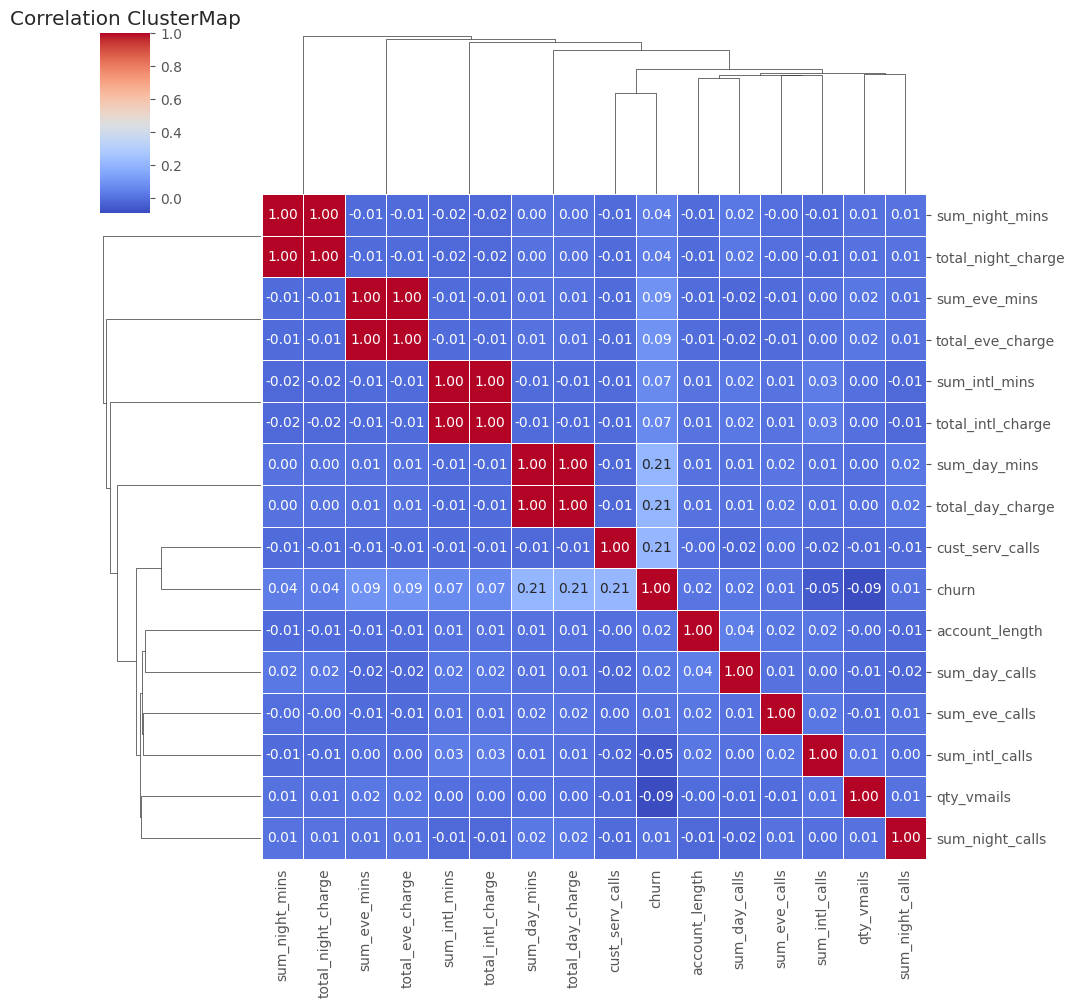

In [123]:
# Print the correlation matrix to identify the pairs with the highest correlation

# Using seaborn's clustermap for a detailed exploration
sns.clustermap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation ClusterMap")
plt.show()

##Removing outliers

We will remove rows with numerical outliers from the DataFrame based on z-scores. We'll set the default z-score threshold at 3.

In [124]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df)
print(df.shape)

(3169, 21)


Identifying the pairs that have a collinearity above 0.75

In [125]:
# pairs with collinearity > 0.75
df2 = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)
df2['pairs'] = list(zip(df2['level_0'], df2['level_1']))
df2.set_index(['pairs'], inplace = True)
df2.drop(columns=['level_1', 'level_0'], inplace = True)
df2.columns = ['cc']
df2.drop_duplicates(inplace=True)
df2[(df2.cc>.75) & (df2.cc<1)]


,cc
pairs,
"(total_day_charge, sum_day_mins)",1.000000
"(sum_eve_mins, total_eve_charge)",1.000000
"(sum_night_mins, total_night_charge)",0.999999
"(sum_intl_mins, total_intl_charge)",0.999992


In [126]:
# drop some columns to address the collinearity
df = df.drop(columns = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge','state','phone_number'])
df.columns

Index(['account_length', 'area_code', 'intl_plan', 'vmail_plan', 'qty_vmails',
       'sum_day_mins', 'sum_day_calls', 'sum_eve_mins', 'sum_eve_calls',
       'sum_night_mins', 'sum_night_calls', 'sum_intl_mins', 'sum_intl_calls',
       'cust_serv_calls', 'churn'],
      dtype='object')

#Feature Engineering

###Label Encoding Binary Columns

Here we transform the categorical data ie International Plan, Voice Mail plan and Churn columns from 'yes' and 'no' or 'true' and 'false' to 0 and 1

In [127]:
from sklearn.preprocessing import LabelEncoder

#Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the binary columns
df['churn'] = label_encoder.fit_transform(df['churn'])
df['intl_plan'] = label_encoder.fit_transform(df['intl_plan'])
df['vmail_plan'] = label_encoder.fit_transform(df['vmail_plan'])
df.head()


,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,sum_eve_mins,sum_eve_calls,sum_night_mins,sum_night_calls,sum_intl_mins,sum_intl_calls,cust_serv_calls,churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [128]:
# Select relevant columns for modeling

main_df = df
df.head()


,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,sum_eve_mins,sum_eve_calls,sum_night_mins,sum_night_calls,sum_intl_mins,sum_intl_calls,cust_serv_calls,churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   account_length   3169 non-null   int64  
 1   area_code        3169 non-null   object 
 2   intl_plan        3169 non-null   int64  
 3   vmail_plan       3169 non-null   int64  
 4   qty_vmails       3169 non-null   int64  
 5   sum_day_mins     3169 non-null   float64
 6   sum_day_calls    3169 non-null   int64  
 7   sum_eve_mins     3169 non-null   float64
 8   sum_eve_calls    3169 non-null   int64  
 9   sum_night_mins   3169 non-null   float64
 10  sum_night_calls  3169 non-null   int64  
 11  sum_intl_mins    3169 non-null   float64
 12  sum_intl_calls   3169 non-null   int64  
 13  cust_serv_calls  3169 non-null   int64  
 14  churn            3169 non-null   int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 396.1+ KB


###Scaling the data

Scaling uses Min-Max Normalization to reduce outlier impact, standardize variables for fair comparisons, and enhance the efficiency of machine learning algorithms.

In [130]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,sum_eve_mins,sum_eve_calls,sum_night_mins,sum_night_calls,sum_intl_mins,sum_intl_calls,cust_serv_calls,churn
0,0.587963,415,0.0,1.0,0.510204,0.773921,0.576271,0.490079,0.487179,0.643519,0.422414,0.487805,0.2,0.2,0.0
1,0.490741,415,0.0,1.0,0.530612,0.450281,0.686441,0.483796,0.521368,0.675595,0.525862,0.713415,0.2,0.2,0.0
2,0.629630,415,0.0,0.0,0.000000,0.706066,0.610169,0.238095,0.581197,0.372024,0.534483,0.621951,0.4,0.0,0.0
3,0.384259,408,1.0,0.0,0.000000,0.881176,0.245763,0.041997,0.393162,0.485450,0.405172,0.280488,0.6,0.4,0.0
4,0.342593,415,1.0,0.0,0.000000,0.466229,0.601695,0.327712,0.683761,0.452381,0.681034,0.493902,0.2,0.6,0.0


##Addressing class imbalance through SMOTE

Synthetic Minority Oversampling Technique ("SMOTE") is a technique used to address imbalanced datasets, particularly when dealing with classification problems where one class significantly outnumbers the other.

In [131]:

# Separate features (X) and target variable (y)
X = main_df.drop(columns=['churn'])
y = main_df['churn']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['churn'] = y_resampled
y_resampled.value_counts()

0.0    2727
1.0    2727
Name: churn, dtype: int64

#Modelling

###Train-test split

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)